In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ks_2samp
import random

In [2]:
#Function to define f (to get M_irr)
def f(spin): #Array of the spins
    f_array=[]
    for i in range(len(spin)):
        f_array.append(np.sqrt((1 + np.sqrt(1 - np.power(spin[i], 2)))/2))
    return f_array

# Part 1 & 2

In [3]:
#Create the datasets
N=10000
mu=1
sigma=0.02
data_spin=np.random.uniform(0,1,N)
data_M=np.random.normal(mu,sigma,N)

In [4]:
#Obtain M_irr 
M_irr=data_M*f(data_spin)

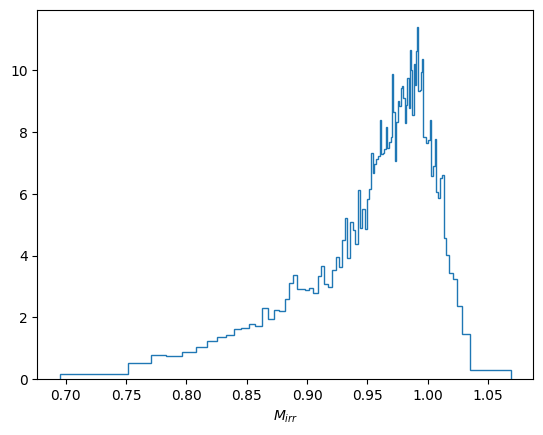

In [5]:
#Obtain the histogram for M_irr (with adjustable bin)
bins100 = np.append(np.sort(M_irr)[::100], np.max(M_irr)) #Create the specific bins
plt.hist(M_irr, bins=bins100, density=True, histtype="step")
plt.xlabel(r'$M_{irr}$')
plt.show()

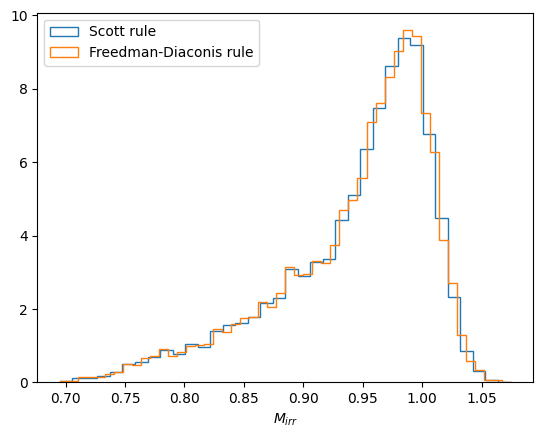

In [6]:
#Rule of thumb for the bin width
import astropy.visualization.hist
astropy.visualization.hist(M_irr, bins="scott", histtype="step",density=True, label = 'Scott rule')
astropy.visualization.hist(M_irr, bins="freedman", histtype="step",density=True, label = 'Freedman-Diaconis rule')
plt.xlabel(r'$M_{irr}$')
plt.legend()
plt.show()

# Part 3

In [7]:
from sklearn.neighbors import KernelDensity
grid = np.linspace(M_irr.min(),M_irr.max(),1000)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(grid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

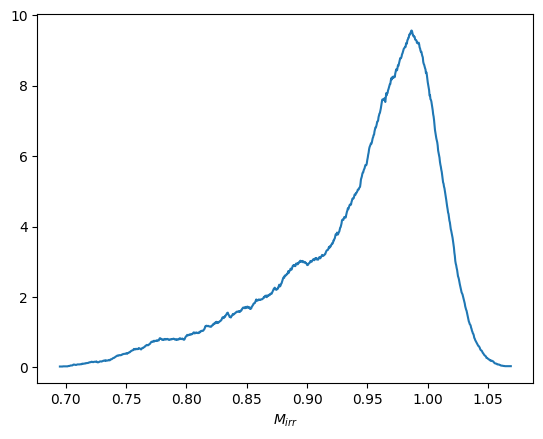

In [8]:
#KDE for M_irr
PDFtophat = kde_sklearn(M_irr,bandwidth=0.01,kernel="tophat") 
plt.plot(grid,PDFtophat);
plt.xlabel(r'$M_{irr}$')
plt.show()

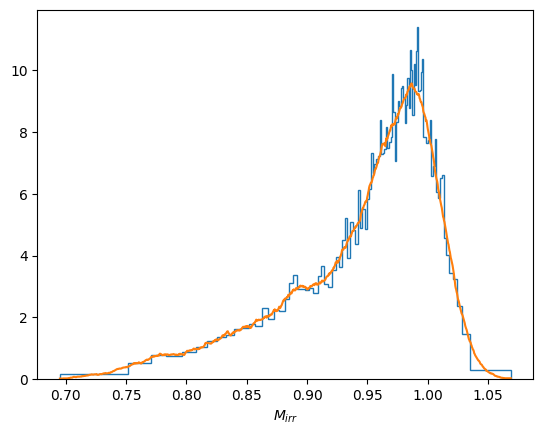

In [9]:
#Compare the two methods
plt.hist(M_irr, bins=bins100, density=True, histtype="step")
plt.plot(grid,PDFtophat)
plt.xlabel(r'$M_{irr}$')
plt.show()

# Part 4 & 5

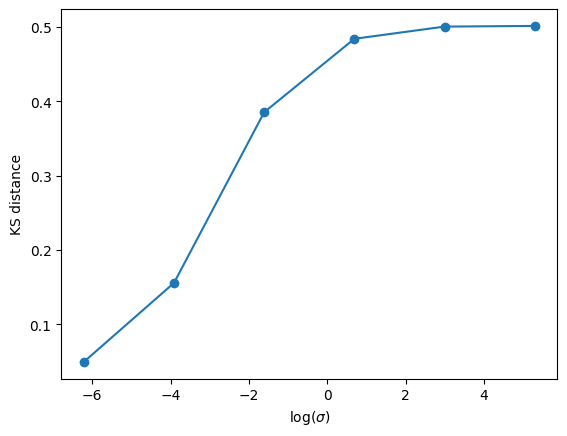

In [10]:
#Compute the KS distance between M_irr/mu and f as a function of sigma
ksdist=[]
for i in [0.002, 0.02, 0.2, 2, 20, 200]:
    sigma = i
    data_M=np.random.normal(mu,sigma,N)
    M_irr=data_M*f(data_spin)
    ksdist.append(ks_2samp(M_irr / mu, f(data_spin))[0])

plt.plot(np.log([0.002, 0.02, 0.2, 2, 20, 200]), ksdist)
plt.scatter(np.log([0.002, 0.02, 0.2, 2, 20, 200]), ksdist)
plt.xlabel(r'$\log(\sigma)$')
plt.ylabel(r'KS distance')
plt.show()

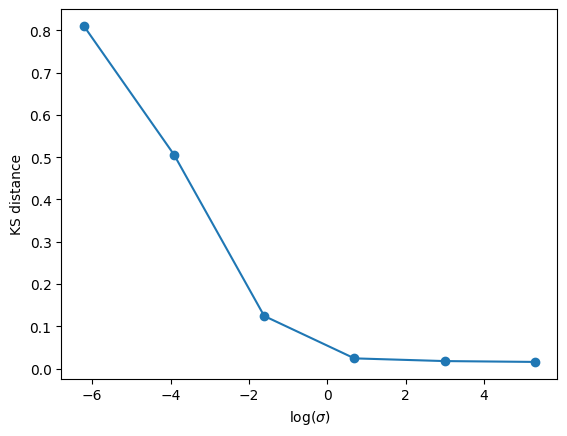

In [11]:
#Compute the KS distance between M_irr and M as a function of sigma
ksdist=[]
for i in [0.002, 0.02, 0.2, 2, 20, 200]:
    sigma = i
    data_M=np.random.normal(mu,sigma,N)
    M_irr=data_M*f(data_spin)
    ksdist.append(ks_2samp(M_irr, data_M)[0])

plt.plot(np.log([0.002, 0.02, 0.2, 2, 20, 200]), ksdist)
plt.scatter(np.log([0.002, 0.02, 0.2, 2, 20, 200]), ksdist)
plt.xlabel(r'$\log(\sigma)$')
plt.ylabel(r'KS distance')
plt.show()